In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('Results_21Mar2022.csv')
df.head()

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,...,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,...,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,...,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,...,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,...,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601,492,female,fish,60-69


In [5]:
df.drop(columns=['mc_run_id'], inplace=True)

In [6]:
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176,1329,female,fish,20-29
1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,...,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014,2024,female,fish,30-39
2,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,...,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589,1689,female,fish,40-49
3,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,...,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428,946,female,fish,50-59
4,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,...,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601,492,female,fish,60-69


In [7]:
participants_per_grouping = df.groupby('grouping')['n_participants'].first()
print(participants_per_grouping)

total_participants = participants_per_grouping.sum()
print('\nTotal number of participants:',total_participants)

grouping
fish_female_20-29    1329
fish_female_30-39    2024
fish_female_40-49    1689
fish_female_50-59     946
fish_female_60-69     492
                     ... 
veggie_male_30-39    1221
veggie_male_40-49     961
veggie_male_50-59     426
veggie_male_60-69     229
veggie_male_70-79     158
Name: n_participants, Length: 72, dtype: int64

Total number of participants: 55504


In [8]:
ch4_conversion_factor = 27
n2o_conversion_factor = 273

df['mean_ghgs_ch4_kg'] = df['mean_ghgs_ch4'] * ch4_conversion_factor * 0.001  
df['mean_ghgs_n2o_kg'] = df['mean_ghgs_n2o'] * n2o_conversion_factor * 0.001  

df['mean_ghgs_co2'] = df['mean_ghgs'] - (df['mean_ghgs_ch4'] + df['mean_ghgs_n2o'])

# gwp100 CO2 equivalent emissions
df['gwp100_co2e'] = df['mean_ghgs_co2'] + df['mean_ghgs_ch4_kg'] + df['mean_ghgs_n2o_kg']

In [9]:
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,249.472563,8.231176,1329,female,fish,20-29,0.031445,0.093820,3.913515,4.038781
1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,...,277.927269,7.947014,2024,female,fish,30-39,0.031161,0.089235,3.955688,4.076084
2,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,...,275.760515,8.103589,1689,female,fish,40-49,0.029927,0.084718,3.870605,3.985251
3,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,...,310.422445,8.712428,946,female,fish,50-59,0.027878,0.081389,3.838389,3.947656
4,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,...,315.922570,8.616601,492,female,fish,60-69,0.029668,0.084831,3.970705,4.085204


In [10]:
mean_ghgs_n2o_per_participant_by_group = {}

for grouping in df['grouping'].unique():
    
    filtered_df = df[df['grouping'] == grouping]
    
    # first n_participants unique rows from the filtered dataframe
    unique_rows = filtered_df.head(filtered_df['n_participants'].iloc[0])
    
    # sum mean_ghgs_n2o values within the extracted datafrane
    sum_mean_ghgs_n2o = unique_rows['mean_ghgs_n2o'].sum()
    
    # number of participants for each grouping
    num_participants = unique_rows['n_participants'].iloc[0]
    
    # mean 'mean_ghgs_n2o' per participant
    n2o_per_n = sum_mean_ghgs_n2o / num_participants
    
    # store in dictionary
    mean_ghgs_n2o_per_participant_by_group[grouping] =  n2o_per_n

for grouping, n2o_per_n in mean_ghgs_n2o_per_participant_by_group.items():
    print(f"'mean_ghgs_n2o' per participant for '{grouping}' grouping:",  n2o_per_n)

'mean_ghgs_n2o' per participant for 'fish_female_20-29' grouping: 0.2426532031136193
'mean_ghgs_n2o' per participant for 'fish_female_30-39' grouping: 0.15907646818774704
'mean_ghgs_n2o' per participant for 'fish_female_40-49' grouping: 0.18970576506571937
'mean_ghgs_n2o' per participant for 'fish_female_50-59' grouping: 0.32360516498414377
'mean_ghgs_n2o' per participant for 'fish_female_60-69' grouping: 0.3413861623414634
'mean_ghgs_n2o' per participant for 'fish_female_70-79' grouping: 0.34548682269743586
'mean_ghgs_n2o' per participant for 'fish_male_20-29' grouping: 0.37886761864417184
'mean_ghgs_n2o' per participant for 'fish_male_30-39' grouping: 0.3547178248446602
'mean_ghgs_n2o' per participant for 'fish_male_40-49' grouping: 0.34334880149074076
'mean_ghgs_n2o' per participant for 'fish_male_50-59' grouping: 0.3384894248785047
'mean_ghgs_n2o' per participant for 'fish_male_60-69' grouping: 0.35250189006289306
'mean_ghgs_n2o' per participant for 'fish_male_70-79' grouping: 0.37

In [11]:
df['n2o_per_n'] = df['grouping'].map(mean_ghgs_n2o_per_participant_by_group)

In [12]:
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sd_acid,n_participants,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e,n2o_per_n
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,8.231176,1329,female,fish,20-29,0.031445,0.093820,3.913515,4.038781,0.242653
1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,...,7.947014,2024,female,fish,30-39,0.031161,0.089235,3.955688,4.076084,0.159076
2,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,...,8.103589,1689,female,fish,40-49,0.029927,0.084718,3.870605,3.985251,0.189706
3,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,...,8.712428,946,female,fish,50-59,0.027878,0.081389,3.838389,3.947656,0.323605
4,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,...,8.616601,492,female,fish,60-69,0.029668,0.084831,3.970705,4.085204,0.341386


In [24]:
first_unique_n_participants = df.groupby('grouping')['n_participants'].first()
total_gwp100_co2e = []

for grouping, n_participants in first_unique_n_participants.items():
    # select the first n_participants entries for each grouping
    filtered_df = df[df['grouping'] == grouping].head(n_participants)
    # sum the gwp100_co2e for the selected entries and append
    total_gwp100_co2e.append(filtered_df['gwp100_co2e'].sum())

# dataframe to store grouping and summed gwp100_co2e values
total_gwp100_co2e_df = pd.DataFrame({'grouping': first_unique_n_participants.index, 'total_gwp100_co2e': total_gwp100_co2e})

# mean gwp100_co2e per participant for each grouping
total_gwp100_co2e_df['(total)_mean_gwp100_co2e_per_n'] = total_gwp100_co2e_df['total_gwp100_co2e'] / first_unique_n_participants.values
print(total_gwp100_co2e_df)


             grouping  total_gwp100_co2e  (total)_mean_gwp100_co2e_per_n
0   fish_female_20-29        3848.393509                        2.895706
1   fish_female_30-39        3894.676830                        1.924247
2   fish_female_40-49        3875.703957                        2.294674
3   fish_female_50-59        3684.678951                        3.895009
4   fish_female_60-69        1975.751627                        4.015755
..                ...                ...                             ...
67  veggie_male_30-39        3787.722035                        3.102147
68  veggie_male_40-49        3503.085881                        3.645251
69  veggie_male_50-59        1499.069849                        3.518943
70  veggie_male_60-69         801.922071                        3.501843
71  veggie_male_70-79         572.768689                        3.625118

[72 rows x 3 columns]


In [29]:
df = pd.merge(df, total_gwp100_co2e_df[['grouping', '(total)_mean_gwp100_co2e_per_n']], on='grouping')
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e,n2o_per_n,(total)_mean_gwp100_co2e_per_n_x,(total)_mean_gwp100_co2e_per_n_y
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,female,fish,20-29,0.031445,0.093820,3.913515,4.038781,0.242653,2.895706,2.895706
1,fish_female_20-29,4.428025,6.842434,15399.48381,23.443819,0.751940,0.316827,257.034793,845.718713,22.615000,...,female,fish,20-29,0.020302,0.086494,3.359259,3.466055,0.242653,2.895706,2.895706
2,fish_female_20-29,4.946890,6.753411,15846.86685,19.551014,0.933251,0.420634,295.397938,835.619685,22.526243,...,female,fish,20-29,0.025198,0.114833,3.593005,3.733036,0.242653,2.895706,2.895706
3,fish_female_20-29,4.378677,5.684974,18472.42478,18.534522,0.841311,0.365687,189.114914,868.080556,21.132210,...,female,fish,20-29,0.022715,0.099833,3.171679,3.294227,0.242653,2.895706,2.895706
4,fish_female_20-29,4.485696,6.111954,12487.77659,22.939979,0.757037,0.341591,269.114151,533.750475,22.448647,...,female,fish,20-29,0.020440,0.093254,3.387068,3.500762,0.242653,2.895706,2.895706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,veggie_male_70-79,4.815775,8.414616,14675.44713,20.080262,0.805090,0.370173,172.695072,479.982493,21.111373,...,male,veggie,70-79,0.021737,0.101057,3.640512,3.763307,0.323090,3.625118,3.625118
71996,veggie_male_70-79,4.857491,6.597441,16497.90647,17.393084,0.907783,0.360945,294.594033,642.633557,22.664034,...,male,veggie,70-79,0.024510,0.098538,3.588763,3.711811,0.323090,3.625118,3.625118
71997,veggie_male_70-79,4.420282,6.897439,22982.13623,20.454581,0.944609,0.355579,324.707977,669.833472,21.539393,...,male,veggie,70-79,0.025504,0.097073,3.120094,3.242672,0.323090,3.625118,3.625118
71998,veggie_male_70-79,5.244864,7.986955,17176.99405,20.597246,0.915564,0.379887,373.766228,497.297924,22.494395,...,male,veggie,70-79,0.024720,0.103709,3.949413,4.077843,0.323090,3.625118,3.625118


In [34]:
#df.drop(columns=['mean_gwp100_co2e_per_n','total_mean_gwp100_co2e_per_n','(total)_mean_gwp100_co2e_per_n_x'], inplace=True)

In [35]:
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,n_participants,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e,n2o_per_n,(total)_mean_gwp100_co2e_per_n
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,1329,female,fish,20-29,0.031445,0.093820,3.913515,4.038781,0.242653,2.895706
1,fish_female_20-29,4.428025,6.842434,15399.48381,23.443819,0.751940,0.316827,257.034793,845.718713,22.615000,...,1329,female,fish,20-29,0.020302,0.086494,3.359259,3.466055,0.242653,2.895706
2,fish_female_20-29,4.946890,6.753411,15846.86685,19.551014,0.933251,0.420634,295.397938,835.619685,22.526243,...,1329,female,fish,20-29,0.025198,0.114833,3.593005,3.733036,0.242653,2.895706
3,fish_female_20-29,4.378677,5.684974,18472.42478,18.534522,0.841311,0.365687,189.114914,868.080556,21.132210,...,1329,female,fish,20-29,0.022715,0.099833,3.171679,3.294227,0.242653,2.895706
4,fish_female_20-29,4.485696,6.111954,12487.77659,22.939979,0.757037,0.341591,269.114151,533.750475,22.448647,...,1329,female,fish,20-29,0.020440,0.093254,3.387068,3.500762,0.242653,2.895706


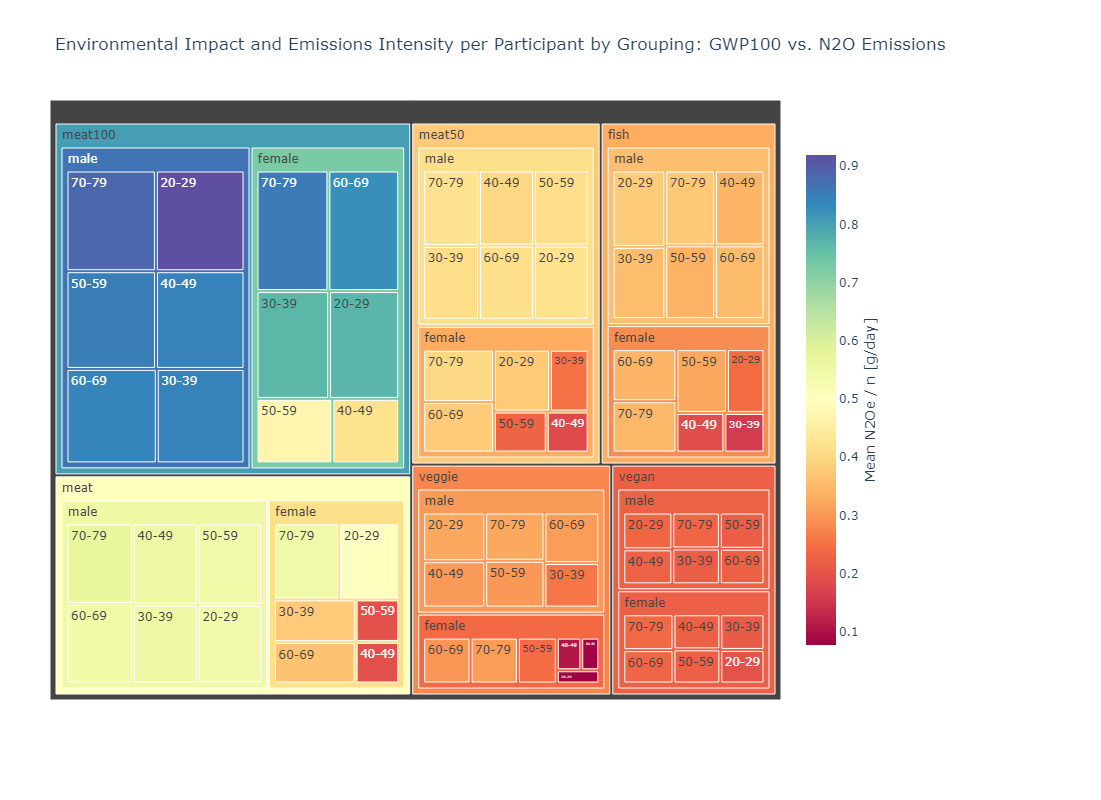

In [36]:
fig = px.treemap(data_frame=df, 
                 path=['diet_group', 'sex', 'age_group'], 
                 values='(total)_mean_gwp100_co2e_per_n', 
                 color='n2o_per_n', 
                 color_continuous_scale='spectral', 
                 title='Environmental Impact and Emissions Intensity per Participant by Grouping: GWP100 vs. N2O Emissions',
                 height=800,
                 width=1200)

fig.update_coloraxes(colorbar_title='Mean N2Oe / n [g/day]', 
                     colorbar=dict(len=0.85, title=dict(side='right'), y=0.5))

fig.update_layout(margin=dict(t=100, r=320, b=100, l=50))
fig.show()

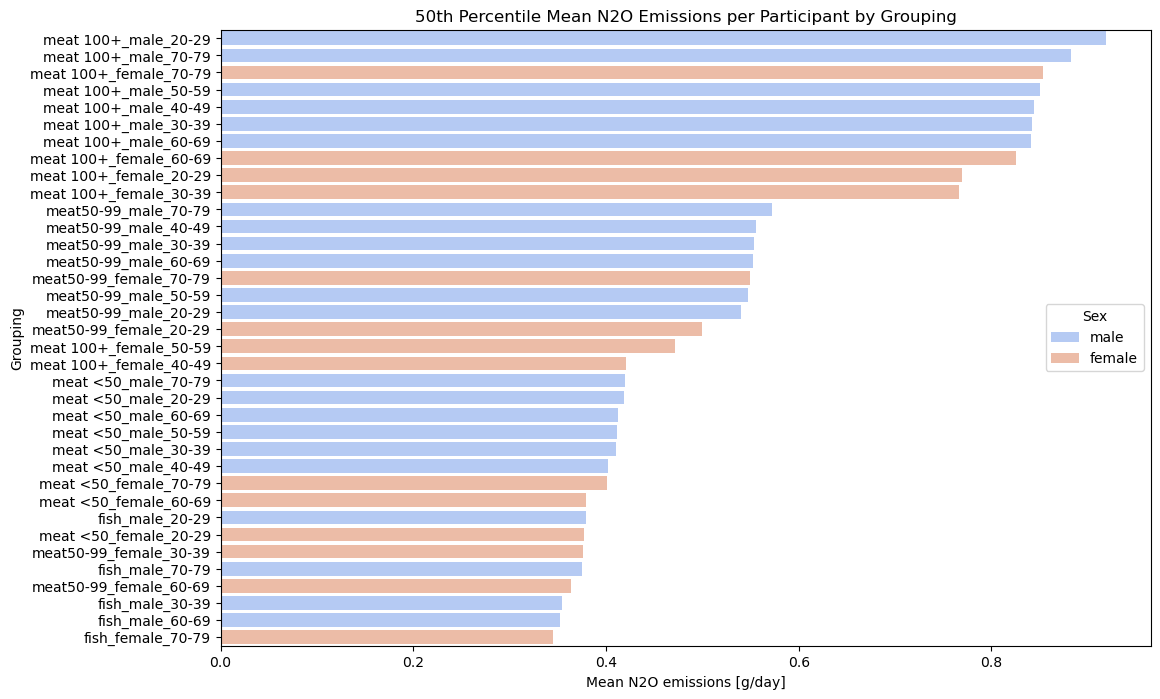

In [17]:
# convert dictionary to dataframe
mean_ghgs_n2o_df = pd.DataFrame(list(mean_ghgs_n2o_per_participant_by_group.items()), columns=['grouping', 'N2O_per_n'])

# merge n2o_df with original df
mean_ghgs_n2o_df = pd.merge(mean_ghgs_n2o_df, df[['grouping', 'sex']], on='grouping')

mean_ghgs_n2o_df_sorted = mean_ghgs_n2o_df.sort_values(by='N2O_per_n', ascending=False)
top_50_percent_rows = int(len(mean_ghgs_n2o_df_sorted) * 0.5)
top_50_percent_df = mean_ghgs_n2o_df_sorted.head(top_50_percent_rows)

plt.figure(figsize=(12, 8))
sns.barplot(x='N2O_per_n', y='grouping', data=top_50_percent_df, hue='sex', palette='coolwarm', dodge=False)
plt.xlabel('Mean N2O emissions [g/day]')
plt.ylabel('Grouping')
plt.title('50th Percentile Mean N2O Emissions per Participant by Grouping')
plt.legend(title='Sex')
plt.show()

# this part doesn't work 
#for i, group in enumerate(top_50_percent_df['grouping']):
    #if '70-79' in group:        
        #ax.text(top_50_percent_df.loc[top_50_percent_df['grouping'] == group, 'n2o_per_n'].values[0], i, group, 
                #color='red', weight='bold')

#plt.show()

In [18]:
male_entries_df = top_50_percent_df[top_50_percent_df['sex'] == 'male']

# number of unique male entries
num_male_unique_entries = male_entries_df['grouping'].nunique()
print("Number of male entries in 50th percentile:", num_male_unique_entries)

num_total_unique_entries = top_50_percent_df['grouping'].nunique()
percentage_male_unique_entries = (num_male_unique_entries / num_total_unique_entries) * 100

print("\nPercentage of male entries in 50th percentile:", f"{percentage_male_unique_entries:.0f} %")

Number of male entries in 50th percentile: 22

Percentage of male entries in 50th percentile: 61 %
